In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [22]:
df = pd.read_csv("C:/Users/chris/Downloads/laptop_prices.csv")

In [23]:
df

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83
...,...,...,...,...,...,...,...,...,...,...,...
11763,Acer,Intel i3,4,2TB SSD,Nvidia RTX 2060,17.3,1366x768,11.5,1.58,macOS,704.82
11764,Asus,Intel i3,4,2TB SSD,AMD Radeon RX 6800,16.0,1366x768,9.5,2.14,Linux,775.59
11765,Razer,AMD Ryzen 9,4,2TB SSD,AMD Radeon RX 6600,15.6,2560x1440,8.2,2.05,Linux,2789.46
11766,Samsung,AMD Ryzen 7,16,512GB SSD,Integrated,13.3,1920x1080,7.5,1.48,macOS,1067.13


Accuracy: 0.5081
Confusion Matrix:
[[319 884]
 [274 877]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.27      0.36      1203
           1       0.50      0.76      0.60      1151

    accuracy                           0.51      2354
   macro avg       0.52      0.51      0.48      2354
weighted avg       0.52      0.51      0.48      2354



c:\Users\chris\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


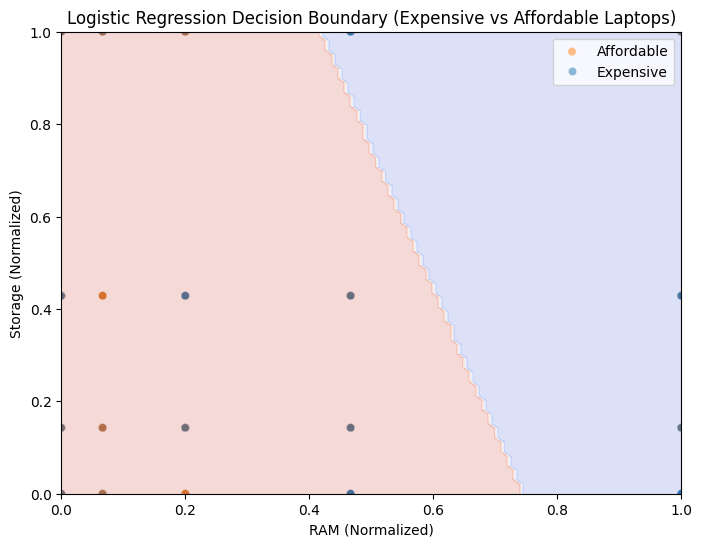

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset (Assuming you already have your dataframe 'df')
# If loading from a CSV file, use: df = pd.read_csv("your_file.csv")

data = {
    "RAM (GB)": np.random.choice([4, 8, 16, 32, 64], size=11768),
    "Storage": np.random.choice([256, 512, 1024, 2048], size=11768),  # Storage in GB
    "Price ($)": np.random.uniform(700, 4000, size=11768),  # Simulated price range
}

df = pd.DataFrame(data)

# Define the target variable (Expensive = 1, Affordable = 0)
median_price = df["Price ($)"].median()
df["Expensive"] = (df["Price ($)"] > median_price).astype(int)

# Select features and normalize them
features = ["RAM (GB)", "Storage"]
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

# Split data into training and testing sets
X = df[features]
y = df["Expensive"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plot decision boundary
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["RAM (GB)"], y=df["Storage"], hue=df["Expensive"], alpha=0.5)

# Creating a mesh grid for decision boundary
xx, yy = np.meshgrid(np.linspace(df["RAM (GB)"].min(), df["RAM (GB)"].max(), 100),
                     np.linspace(df["Storage"].min(), df["Storage"].max(), 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, cmap="coolwarm")
plt.xlabel("RAM (Normalized)")
plt.ylabel("Storage (Normalized)")
plt.title("Logistic Regression Decision Boundary (Expensive vs Affordable Laptops)")
plt.legend(["Affordable", "Expensive"])
plt.show()
